In [6]:
import seaborn as sns
import numpy as np
import sys
sys.path.append("../code/")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
tensor = np.load("../2015-5appliances-true-agg.npy")

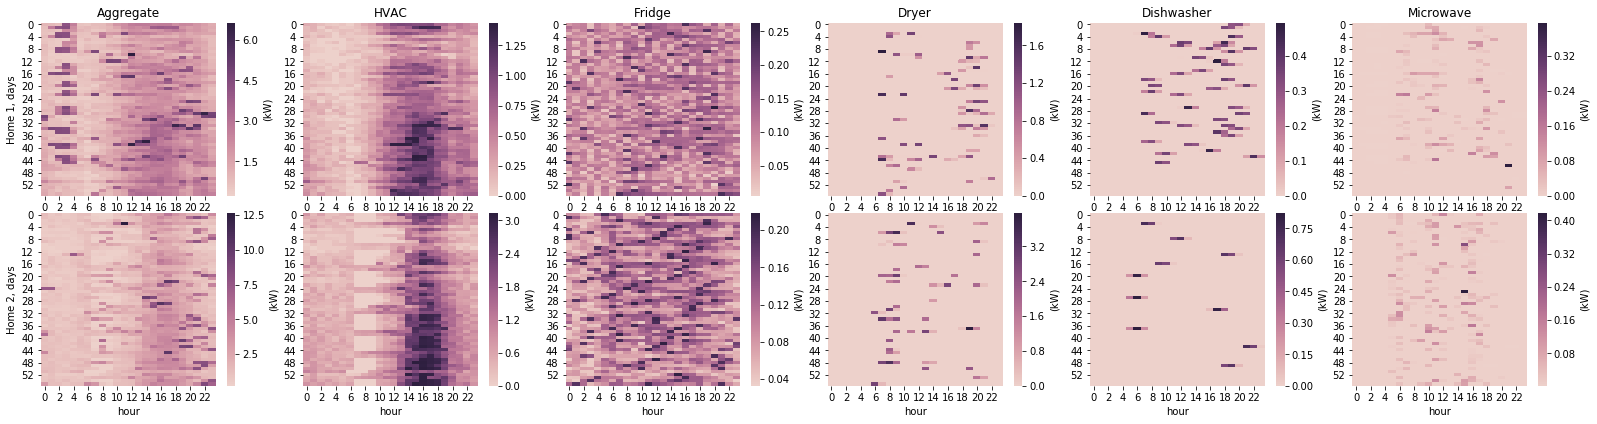

In [68]:
fig, axes = plt.subplots(ncols=6, nrows = 2, figsize=(25, 6))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)

for i, home in enumerate([12, 10]):
    sns.heatmap(tensor[home, 0, :56]/1000, cmap=cmap, ax=ax[i*6], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 1, :56]/1000, cmap=cmap, ax=ax[i*6+1], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 2, :56]/1000, cmap=cmap, ax=ax[i*6+2], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 3, :56]/1000, cmap=cmap, ax=ax[i*6+3], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 4, :56]/1000, cmap=cmap, ax=ax[i*6+4], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 5, :56]/1000, cmap=cmap, ax=ax[i*6+5], cbar_kws={'label': '(kW)'})
ax[0].set_ylabel('Home 1, days')
ax[6].set_ylabel('Home 2, days')
i=1
ax[i*6+0].set_xlabel('hour')
ax[i*6+1].set_xlabel('hour')
ax[i*6+2].set_xlabel('hour')
ax[i*6+3].set_xlabel('hour')
ax[i*6+4].set_xlabel('hour')
ax[i*6+5].set_xlabel('hour')
i=0
ax[i*6].set_title('Aggregate')
ax[i*6+1].set_title('HVAC')
ax[i*6+2].set_title('Fridge')
ax[i*6+3].set_title('Dryer')
ax[i*6+4].set_title('Dishwasher')
ax[i*6+5].set_title('Microwave')
fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.1, wspace=0.2)
# plt.savefig("./figure/heatmap_home_all.pdf", format='pdf',bbox_inches='tight', pad_inches=0)

IndexError: index 6 is out of bounds for axis 0 with size 6

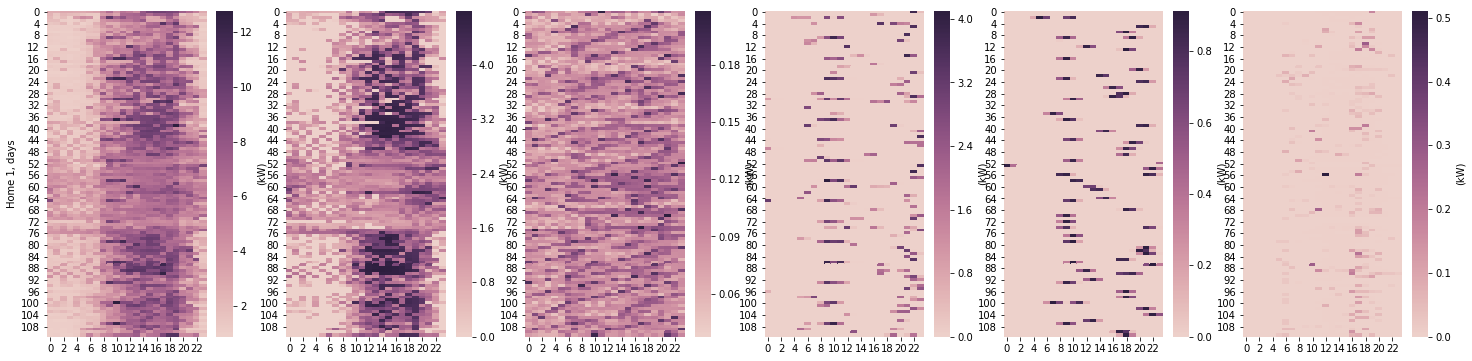

In [67]:
fig, axes = plt.subplots(ncols=6, nrows = 1, figsize=(25, 6))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)

for i, home in enumerate([51]):
    sns.heatmap(tensor[home, 0 ]/1000, cmap=cmap, ax=ax[i*6], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 1 ]/1000, cmap=cmap, ax=ax[i*6+1], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 2 ]/1000, cmap=cmap, ax=ax[i*6+2], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 3 ]/1000, cmap=cmap, ax=ax[i*6+3], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 4 ]/1000, cmap=cmap, ax=ax[i*6+4], cbar_kws={'label': '(kW)'})
    sns.heatmap(tensor[home, 5 ]/1000, cmap=cmap, ax=ax[i*6+5], cbar_kws={'label': '(kW)'})
ax[0].set_ylabel('Home 1, days')
# ax[6].set_ylabel('Home 2, days')
fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.1, wspace=0.2)
# plt.savefig("./figure/heatmap_home_all.pdf", format='pdf',bbox_inches='tight', pad_inches=0)

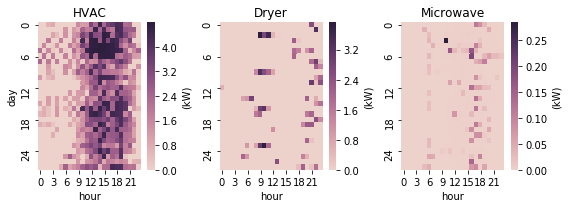

In [29]:
fig, axes = plt.subplots(ncols=3, nrows = 1, figsize=(8, 3))
ax = axes.flatten()
home = 51
cmap = sns.cubehelix_palette(as_cmap=True)

sns.heatmap(tensor[home, 1, :56]/1000, cmap=cmap, ax=ax[0], cbar_kws={'label': '(kW)'}, yticklabels = 6)
sns.heatmap(tensor[home, 3, :56]/1000, cmap=cmap, ax=ax[1], cbar_kws={'label': '(kW)'}, yticklabels = 6)
sns.heatmap(tensor[home, 5, 84:112]/1000, cmap=cmap, ax=ax[2], cbar_kws={'label': '(kW)'}, yticklabels = 6)

ax[0].set_ylabel('day')
ax[0].set_xlabel('hour')
ax[1].set_xlabel('hour')
ax[2].set_xlabel('hour')

ax[0].set_title('HVAC')
ax[1].set_title('Dryer')
ax[2].set_title('Microwave')
fig.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)
plt.savefig("./figure/heatmap_home_sub.pdf", format='pdf')

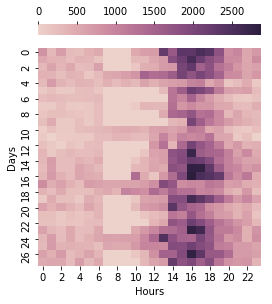

In [50]:
from numpy import *
import os
import matplotlib.pyplot as plt
# fig, axes = plt.subplots(ncols=1, nrows = 2, figsize=(8, 3))


# data = loadtxt(os.getcwd()+txtfl[0], skiprows=1)
# fig1 = plt.figure()
plt.figure(figsize=(4, 5))


ax=sns.heatmap(tensor[10, 1, :28], cmap=cmap, cbar_kws = dict(use_gridspec=False,location="top"))
fig.tight_layout()
ax.set_ylabel("Days")
ax.set_xlabel("Hours")
# plt.savefig("./figure/heatmap_CNN.pdf", format='pdf')

plt.savefig("./figure/CNN_example_hvac.pdf", format='pdf')